In [9]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
df = pd.read_csv("C:/Users/Sandesh/Desktop/hate-speech-dataset/annotations_metadata.csv")

In [27]:
mydir = 'C:\\Users\\Sandesh\\Desktop\\hate-speech-dataset\\all_files'

In [28]:
def get_comment(file):
    with open(os.path.join(mydir,file+".txt"), 'r', encoding='utf8') as f:
        return f.read().lower()
    return

In [29]:
df['text'] = df['file_id'].apply(lambda x:get_comment(x))

In [6]:
df.label.value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

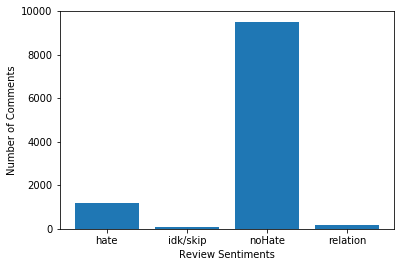

In [7]:
label_count=df.groupby('label').count()
plt.bar(label_count.index.values, label_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Comments')
plt.show()

In [34]:
mapping = {'noHate': 1, 'hate':2, 'relation':3,'idk/skip':4 }
df['new_label'] = df['label'].apply(lambda s: mapping.get(s))

In [35]:
df.head()

,file_id,user_id,subforum_id,num_contexts,label,text,new_label
0,12834217_1,572066,1346,0,noHate,"as of march 13th , 2014 , the booklet had been...",1
1,12834217_2,572066,1346,0,noHate,in order to help increase the booklets downloa...,1
2,12834217_3,572066,1346,0,noHate,( simply copy and paste the following text int...,1
3,12834217_4,572066,1346,0,hate,click below for a free download of a colorfull...,2
4,12834217_5,572066,1346,0,noHate,click on the `` download ( 7.42 mb ) '' green ...,1


In [36]:
df1 = df.loc[(df["label"]=='hate') | (df["label"]=='noHate')]

In [39]:
df1.label.value_counts()

noHate    9507
hate      1196
Name: label, dtype: int64

In [43]:
len(df1)

10703

In [44]:
## BOW
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(df1['text'])

In [45]:
X = text_counts
y = df1.new_label
print("X = ",X.shape," , y = ",y.shape)

X =  (10703, 15576)  , y =  (10703,)


In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [48]:
from sklearn.svm import SVC
from sklearn import metrics

svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [50]:
pred = svclassifier.predict(X_test)
print("Linear SVM Accuracy:",metrics.accuracy_score(y_test, pred))

Linear SVM Accuracy: 0.8888369920597852


In [52]:
## Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear'), X, y, scoring='accuracy', cv=5)

array([0.88468721, 0.88790285, 0.88598131, 0.89345794, 0.8817757 ])

# AS PER EXPERIMENTAL SETUP

All the sentences labelled as `HATE` have been collected, and an equivalent number of `NOHATE` sentences have been randomly
sampled, summing up 2k labelled sentences. 

Training: Test split = 80%:20%

In [55]:
df1['text'][0]

'as of march 13th , 2014 , the booklet had been downloaded over 18,300 times and counting .'

In [73]:
len(df1[df1['label']=='hate'])

1196

In [74]:
len(df1[df1['label']=='noHate'])

9507

In [69]:
df2 = df1[(df1['text'].apply(lambda x: len(x.split()))>=3) & (df1['text'].apply(lambda x: len(x.split()))<=50)]

In [70]:
len(df2)

10023

In [87]:
df2_hate = df2[df2['label']=='hate']

In [88]:
df2_noHate = df2[df2['label']=='noHate']

In [89]:
len(df2_hate), len(df2_noHate)

(1154, 8869)

In [83]:
### Testing 
import numpy as np

np.random.choice(df2['text'], 10, replace=False)

array(["book : tell the truth and shame the devil `` tell the truth and shame the devil '' in english and german .",
       'we do not want to annhilate other races , we simply want to preserve our own .',
       'i had actualy written th epost for last summer but had to cancel my trip ... so it is 2005 !!! ok every body cool ? * l * shann 2508',
       "i 've seen it and currently live it , and let me tell you it is not pretty .",
       'its not scarey at all anymore .', 'i live near london , on .',
       'hey guys please go here to help us send the mexicans back to mexico .',
       "it is n't enough that we support mesico now we have to support africa .",
       'light skin but dark hair ...',
       "why have n't we thought about that over here ?"], dtype=object)

In [97]:
sample_hate = df2_hate.sample(1000)
print(len(sample_hate))

1000


In [98]:
sample_nohate = df2_noHate.sample(1000)
print(len(sample_nohate))

1000


In [99]:
new_df = pd.concat([sample_hate, sample_nohate], axis=0, join='outer')

In [100]:
new_df['label'].value_counts()

hate      1000
noHate    1000
Name: label, dtype: int64

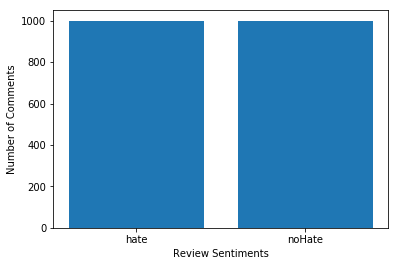

In [102]:
label_count=new_df.groupby('label').count()
plt.bar(label_count.index.values, label_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Comments')
plt.show()

In [111]:
from sklearn.utils import shuffle

df_new = shuffle(new_df)

In [116]:
len(df_new)

2000

In [113]:
## BOW
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_new = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts_new= cv.fit_transform(df_new['text'])

In [118]:
X1 = text_counts_new
y1 = df_new.new_label
print("X = ",X1.shape," , y = ",y1.shape)

X =  (2000, 5631)  , y =  (2000,)


In [119]:
from sklearn.model_selection import train_test_split

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.20)

In [120]:
from sklearn.svm import SVC
from sklearn import metrics

svclassifier = SVC(kernel='linear')
svclassifier.fit(X1_train, y1_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
pred = svclassifier.predict(X1_test)
print("Linear SVM Accuracy:",metrics.accuracy_score(y1_test, pred))

Linear SVM Accuracy: 0.6875


In [124]:
## Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear'), X1, y1, scoring='accuracy', cv=5)

array([0.7425, 0.6975, 0.745 , 0.73  , 0.6825])

# Experiement 2

## Including relation as hatespeech

In [30]:
df.label.value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

In [31]:
df3 = df

In [32]:
df3['label'][df3.label=='relation']= 'hate'

c:\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [33]:
df3.label.value_counts()

noHate      9507
hate        1364
idk/skip      73
Name: label, dtype: int64

In [79]:
df3_hate = df3[df3['label']=='hate']
df3_noHate = df3[df3['label']=='noHate']
len(df3_hate), len(df3_noHate)

(1364, 9507)

In [93]:
sample_hate1 = df3_hate.sample(1000)
print(len(sample_hate1))

1000


In [94]:
sample_nohate1 = df3_noHate.sample(1000)
print(len(sample_nohate1))

1000


In [95]:
new_df1 = pd.concat([sample_hate1, sample_nohate1], axis=0, join='outer')

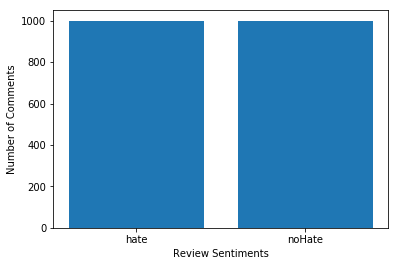

In [96]:
label_count=new_df1.groupby('label').count()
plt.bar(label_count.index.values, label_count['text'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Comments')
plt.show()

In [105]:
from sklearn.utils import shuffle

df_new1 = shuffle(new_df1)

In [106]:
df_new1.head()

,file_id,user_id,subforum_id,num_contexts,label,text
7262,14414465_4,573600,1375,0,hate,when will people * * * * * * * wake up ?
1876,30406276_2,734886,1348,0,hate,"raising 1 healthy , racially aware child is wo..."
4180,30608518_2,573267,1359,0,hate,seems like a cowardly way to fight .
7711,31755241_1,573774,1363,0,hate,if he 's a coke addict - try to find out where...
9125,14036151_1,595761,1387,1,hate,"one is one too many , i bet all the white girl..."


In [107]:
mapping = {'noHate': 1, 'hate':2, 'relation':3,'idk/skip':4 }
df_new1['new_label'] = df_new1['label'].apply(lambda s: mapping.get(s))

len(df_new1)

c:\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


2000

In [108]:
## BOW
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv_new = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts_new1= cv_new.fit_transform(df_new1['text'])

In [109]:
X2 = text_counts_new1
y2 = df_new1.new_label
print("X = ",X2.shape," , y = ",y2.shape)

X =  (2000, 5758)  , y =  (2000,)


In [110]:
from sklearn.model_selection import train_test_split

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.20)

In [111]:
from sklearn.svm import SVC
from sklearn import metrics

svclassifier = SVC(kernel='linear')
svclassifier.fit(X2_train, y2_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [112]:
pred = svclassifier.predict(X2_test)
print("Linear SVM Accuracy:",metrics.accuracy_score(y2_test, pred))

Linear SVM Accuracy: 0.715


In [77]:
## Cross validation
from sklearn.model_selection import cross_val_score

cross_val_score(SVC(kernel='linear'), X2, y2, scoring='accuracy', cv=5)

array([0.7   , 0.6975, 0.73  , 0.715 , 0.6475])

In [92]:
print("Linear SVM Accuracy:",metrics.accuracy_score(y2_test, pred))

Linear SVM Accuracy: 0.7025
